In [34]:
import pandas as pd
import numpy as np

from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain

c:\Users\zijia\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to import duecredit due to No module named 'duecredit'


In [71]:
res = pd.read_csv("./result.csv")
res

,uplift
0,0.024704
1,-0.029837
2,0.029200
3,0.285854
4,0.079293
...,...
39995,-0.072831
39996,0.312550
39997,0.004006
39998,-0.035761


In [59]:
data = pd.read_parquet("./test.parquet").reset_index(drop=True)
data

,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_informative,x7_informative,x8_informative,x9_informative,x10_informative,...,x63_increase_mix,x64_uplift_decrease,x65_uplift_decrease,x66_uplift_decrease,x67_uplift_decrease,x68_uplift_decrease,x69_decrease_mix,x70_decrease_mix,is_treated,outcome
0,5.106267,0.430688,6.923134,-2.116534,-2.279368,3.051149,2.418913,-1.445560,0.877808,-3.197694,...,-4.829716,0.026837,-0.351343,0.638148,0.293386,-1.041415,0.762658,-0.662472,0,0
1,0.926529,-0.260791,0.088826,-4.163502,-1.216504,-1.781015,1.384892,0.460419,-0.074171,-1.123092,...,-1.745936,1.739116,-1.815724,1.068155,-1.041973,-1.532058,1.312900,0.852284,1,1
2,0.745520,1.084567,7.526102,-2.507796,-0.409281,0.680765,10.870407,1.059747,0.452926,2.319790,...,-2.517032,-0.873627,-1.510808,0.999719,-2.249314,-0.365088,1.876791,0.327159,1,0
3,0.257413,1.529639,-9.399460,0.360517,0.323842,-3.011947,-1.826047,0.726197,1.810855,-5.045248,...,2.382713,1.670348,-2.495528,2.777032,-2.830507,-1.796065,1.999440,-2.620158,1,0
4,-0.834775,0.009241,0.976204,2.348888,0.841015,-4.234356,1.665012,-2.005577,-3.559663,1.443152,...,-2.891882,2.824058,-0.972126,1.083996,-0.619365,-0.444817,0.104904,-0.329464,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.583301,-0.822928,6.609930,-3.261348,-0.996874,4.121226,1.936465,0.648381,-2.377110,1.290543,...,-5.336415,0.358152,0.792332,-1.483732,1.354623,2.082184,-0.593301,4.689900,1,0
39996,-1.014838,1.880765,2.865747,3.977965,2.929638,-4.110164,-0.488669,0.247697,1.135624,2.448915,...,0.313445,0.593446,-0.435596,0.704262,-0.707015,-0.527772,-0.730871,0.704820,0,1
39997,-5.473514,-0.212614,-5.262756,0.303233,-0.265900,-3.239057,1.876990,0.774114,-1.892826,-1.489768,...,-3.242045,0.333675,-1.201975,-0.565466,-0.402457,-1.577973,0.419012,-1.978683,1,0
39998,-2.797052,-0.547511,4.623105,-6.666914,-0.967806,0.219692,-6.114275,0.402284,-5.521692,1.004653,...,-3.604812,-0.875878,-0.351592,1.382547,-1.358404,0.636050,1.444653,0.327951,1,1


In [72]:
data["uplift"] = res["uplift"]

In [73]:
data1 = data.sort_values(by=["uplift"], ascending=False)

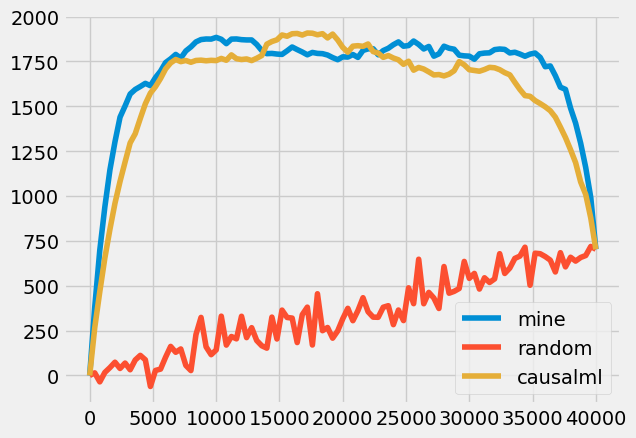

In [74]:
import matplotlib.pyplot as plt

X = [0]
Y = [0]
L = [0]
C = [0]
step = 40000 // 100
for i in range(1, 101):
    subdata = data1.iloc[:i*step, :]
    n_pt = subdata[(subdata.is_treated == 1) & (subdata.outcome == 1)].shape[0]
    n_t = subdata[(subdata.is_treated == 1)].shape[0]
    n_pc = subdata[(subdata.is_treated == 0) & (subdata.outcome == 1)].shape[0]
    n_c = subdata[(subdata.is_treated == 0)].shape[0]
    X.append(step*i)
    Y.append(step*i*(n_pt/n_t - n_pc/n_c))
    subdata = data2.iloc[:i*step, :]
    n_pt = subdata[(subdata.is_treated == 1) & (subdata.outcome == 1)].shape[0]
    n_t = subdata[(subdata.is_treated == 1)].shape[0]
    n_pc = subdata[(subdata.is_treated == 0) & (subdata.outcome == 1)].shape[0]
    n_c = subdata[(subdata.is_treated == 0)].shape[0]
    C.append(step*i*(n_pt/n_t - n_pc/n_c))
    subdata = data.sample(i*step)
    n_pt = subdata[(subdata.is_treated == 1) & (subdata.outcome == 1)].shape[0]
    n_t = subdata[(subdata.is_treated == 1)].shape[0]
    n_pc = subdata[(subdata.is_treated == 0) & (subdata.outcome == 1)].shape[0]
    n_c = subdata[(subdata.is_treated == 0)].shape[0]
    L.append(step*i*(n_pt/n_t - n_pc/n_c))
plt.plot(X,Y, label="mine")
plt.plot(X,L, label="random")
plt.plot(X,C, label="causalml")
plt.legend()

In [45]:
uplift_model = UpliftRandomForestClassifier(control_name='c')
train_data = pd.read_parquet("./train.parquet")
train_data

,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_informative,x7_informative,x8_informative,x9_informative,x10_informative,...,x63_increase_mix,x64_uplift_decrease,x65_uplift_decrease,x66_uplift_decrease,x67_uplift_decrease,x68_uplift_decrease,x69_decrease_mix,x70_decrease_mix,is_treated,outcome
0,11.677316,-0.363326,-1.615357,4.401584,2.138439,3.843107,7.077732,-1.513265,5.105937,-5.439866,...,5.430691,1.830255,1.555148,0.360392,0.453237,1.764438,-1.266092,0.915323,0,0
1,-2.151697,-0.940904,3.653527,0.887979,1.090351,-0.701387,3.903696,-0.016824,1.572998,5.871103,...,-1.644893,0.855359,-1.594827,1.936842,-1.793020,-0.960052,0.884272,-0.560918,1,0
2,-2.824230,0.688746,-5.572691,-4.216047,0.323175,10.690926,-4.908992,0.778725,2.433296,4.239855,...,-1.405329,2.134457,-2.390528,1.252858,-0.694995,-3.577731,0.385707,-1.563923,0,0
3,1.022243,-0.377814,5.288038,3.064564,0.023173,-1.181561,4.479501,0.041767,-1.413278,4.288701,...,-4.835588,1.854128,-1.922697,0.706669,-0.683866,-2.655028,0.506859,-1.899482,0,0
4,-3.827054,0.364068,8.480409,4.129431,-0.391983,-6.177262,5.621384,0.168671,3.006090,11.304698,...,-1.032715,-0.190714,-1.102624,0.742789,-0.728999,-1.172916,0.720265,-1.029435,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,1.967940,-0.365147,5.355471,-0.974847,0.164206,4.203860,-6.421512,0.369511,2.805921,-0.479923,...,-2.004725,2.725836,-1.754984,0.534708,-1.113281,-2.348737,0.770502,-1.661297,1,1
159996,1.656835,0.727896,2.695604,-3.338908,-0.313544,-3.954068,-2.460238,-1.016514,0.384709,-1.308273,...,0.629697,1.533525,-0.874476,1.391550,-1.408227,-0.202269,1.199751,0.099217,0,1
159997,1.749709,-0.033394,0.955049,0.049407,-1.457771,-2.830505,-3.353049,0.628519,-3.727531,1.156346,...,-2.794632,1.805073,-0.444810,0.989758,-0.740285,-0.174327,1.189080,-2.472334,0,1
159998,-1.775769,-1.299384,-0.730509,3.705946,0.811278,-4.947497,3.184146,-1.032275,-5.944338,-0.563570,...,-0.898051,2.163249,-0.389258,-0.293943,0.564767,-1.377242,-0.777221,0.161012,0,1


In [46]:
train_data["treat"] = "c"
train_data.loc[train_data.is_treated == 1, "treat"] = "t"
x_names = list(filter(lambda x: x not in ["is_treated", "outcome", "treat"], train_data.columns))


In [49]:
uplift_model.fit(train_data[x_names].values, treatment=train_data["treat"].values, y=train_data["outcome"].values)

In [62]:
preds = uplift_model.predict(data[x_names])

In [63]:
data["causalml"] = preds[:, 0]

In [64]:
data2 = data.sort_values(by=["causalml"], ascending=False)


In [65]:
data

,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_informative,x7_informative,x8_informative,x9_informative,x10_informative,...,x65_uplift_decrease,x66_uplift_decrease,x67_uplift_decrease,x68_uplift_decrease,x69_decrease_mix,x70_decrease_mix,is_treated,outcome,uplift,causalml
0,5.106267,0.430688,6.923134,-2.116534,-2.279368,3.051149,2.418913,-1.445560,0.877808,-3.197694,...,-0.351343,0.638148,0.293386,-1.041415,0.762658,-0.662472,0,0,0.015551,0.020555
1,0.926529,-0.260791,0.088826,-4.163502,-1.216504,-1.781015,1.384892,0.460419,-0.074171,-1.123092,...,-1.815724,1.068155,-1.041973,-1.532058,1.312900,0.852284,1,1,0.004240,0.000757
2,0.745520,1.084567,7.526102,-2.507796,-0.409281,0.680765,10.870407,1.059747,0.452926,2.319790,...,-1.510808,0.999719,-2.249314,-0.365088,1.876791,0.327159,1,0,0.078910,0.101267
3,0.257413,1.529639,-9.399460,0.360517,0.323842,-3.011947,-1.826047,0.726197,1.810855,-5.045248,...,-2.495528,2.777032,-2.830507,-1.796065,1.999440,-2.620158,1,0,0.083092,0.010874
4,-0.834775,0.009241,0.976204,2.348888,0.841015,-4.234356,1.665012,-2.005577,-3.559663,1.443152,...,-0.972126,1.083996,-0.619365,-0.444817,0.104904,-0.329464,1,1,0.083976,0.087288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-0.583301,-0.822928,6.609930,-3.261348,-0.996874,4.121226,1.936465,0.648381,-2.377110,1.290543,...,0.792332,-1.483732,1.354623,2.082184,-0.593301,4.689900,1,0,-0.115776,-0.022262
39996,-1.014838,1.880765,2.865747,3.977965,2.929638,-4.110164,-0.488669,0.247697,1.135624,2.448915,...,-0.435596,0.704262,-0.707015,-0.527772,-0.730871,0.704820,0,1,0.216868,0.187560
39997,-5.473514,-0.212614,-5.262756,0.303233,-0.265900,-3.239057,1.876990,0.774114,-1.892826,-1.489768,...,-1.201975,-0.565466,-0.402457,-1.577973,0.419012,-1.978683,1,0,0.000248,0.008733
39998,-2.797052,-0.547511,4.623105,-6.666914,-0.967806,0.219692,-6.114275,0.402284,-5.521692,1.004653,...,-0.351592,1.382547,-1.358404,0.636050,1.444653,0.327951,1,1,0.007121,0.008108
